# Exercise: Build decision tree model to predict survival based on certain parameters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
#figuring out the percentage of null values in age column
age_null= df['Age'].isnull().sum()/len(df['Age']) *100

In [46]:
print(f'the percentage of null value in age column is :{age_null}')

the percentage of null value in age column is :19.865319865319865


In [34]:
#imputing the null values in age column with median

df['Age']= df['Age'].fillna(df['Age'].median())

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
# making another data frame with the required column for prediction

df1= df[['Survived', 'Pclass', 'Sex', 'Age','Fare']]


In [56]:
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


In [60]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

# Feature encoding

In [62]:
#we have sex column with categorical data so needed to convert it into numerical

from sklearn.preprocessing import LabelEncoder


In [68]:
le_sex= LabelEncoder()

In [72]:
df1['Sex_le']= le_sex.fit_transform(df1['Sex'])

C:\Users\mamta shresth\AppData\Local\Temp\ipykernel_12940\184065168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex_le']= le_sex.fit_transform(df1['Sex'])


In [74]:
df1

,Survived,Pclass,Sex,Age,Fare,Sex_le
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,28.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [82]:
df1.drop('Sex', axis='columns', inplace=True)

C:\Users\mamta shresth\AppData\Local\Temp\ipykernel_12940\4206302419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Sex', axis='columns', inplace=True)


In [84]:
# now splitting the data into dependent and independent
x= df1.drop('Survived', axis='columns')
y= df1.Survived

In [86]:
x

,Pclass,Age,Fare,Sex_le
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [88]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train_test_split

In [91]:
# Training and testing model

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.1, random_state=20)

In [97]:
x_train

,Pclass,Age,Fare,Sex_le
172,3,1.0,11.1333,0
10,3,4.0,16.7000,0
216,3,27.0,7.9250,0
182,3,9.0,31.3875,1
779,1,43.0,211.3375,0
...,...,...,...,...
218,1,32.0,76.2917,0
223,3,28.0,7.8958,1
271,3,25.0,0.0000,1
474,3,22.0,9.8375,0


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
model= DecisionTreeClassifier()

In [104]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [108]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

# # predict the survival of a person who:
# 1. from 3rd class
# 2. is a male
# 3. age is 67
# 4. fare is $19.89

In [117]:
model.predict([[3,0,67,19.89]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [122]:
from sklearn import tree

In [135]:
model.score(x_test,y_test)

0.7888888888888889

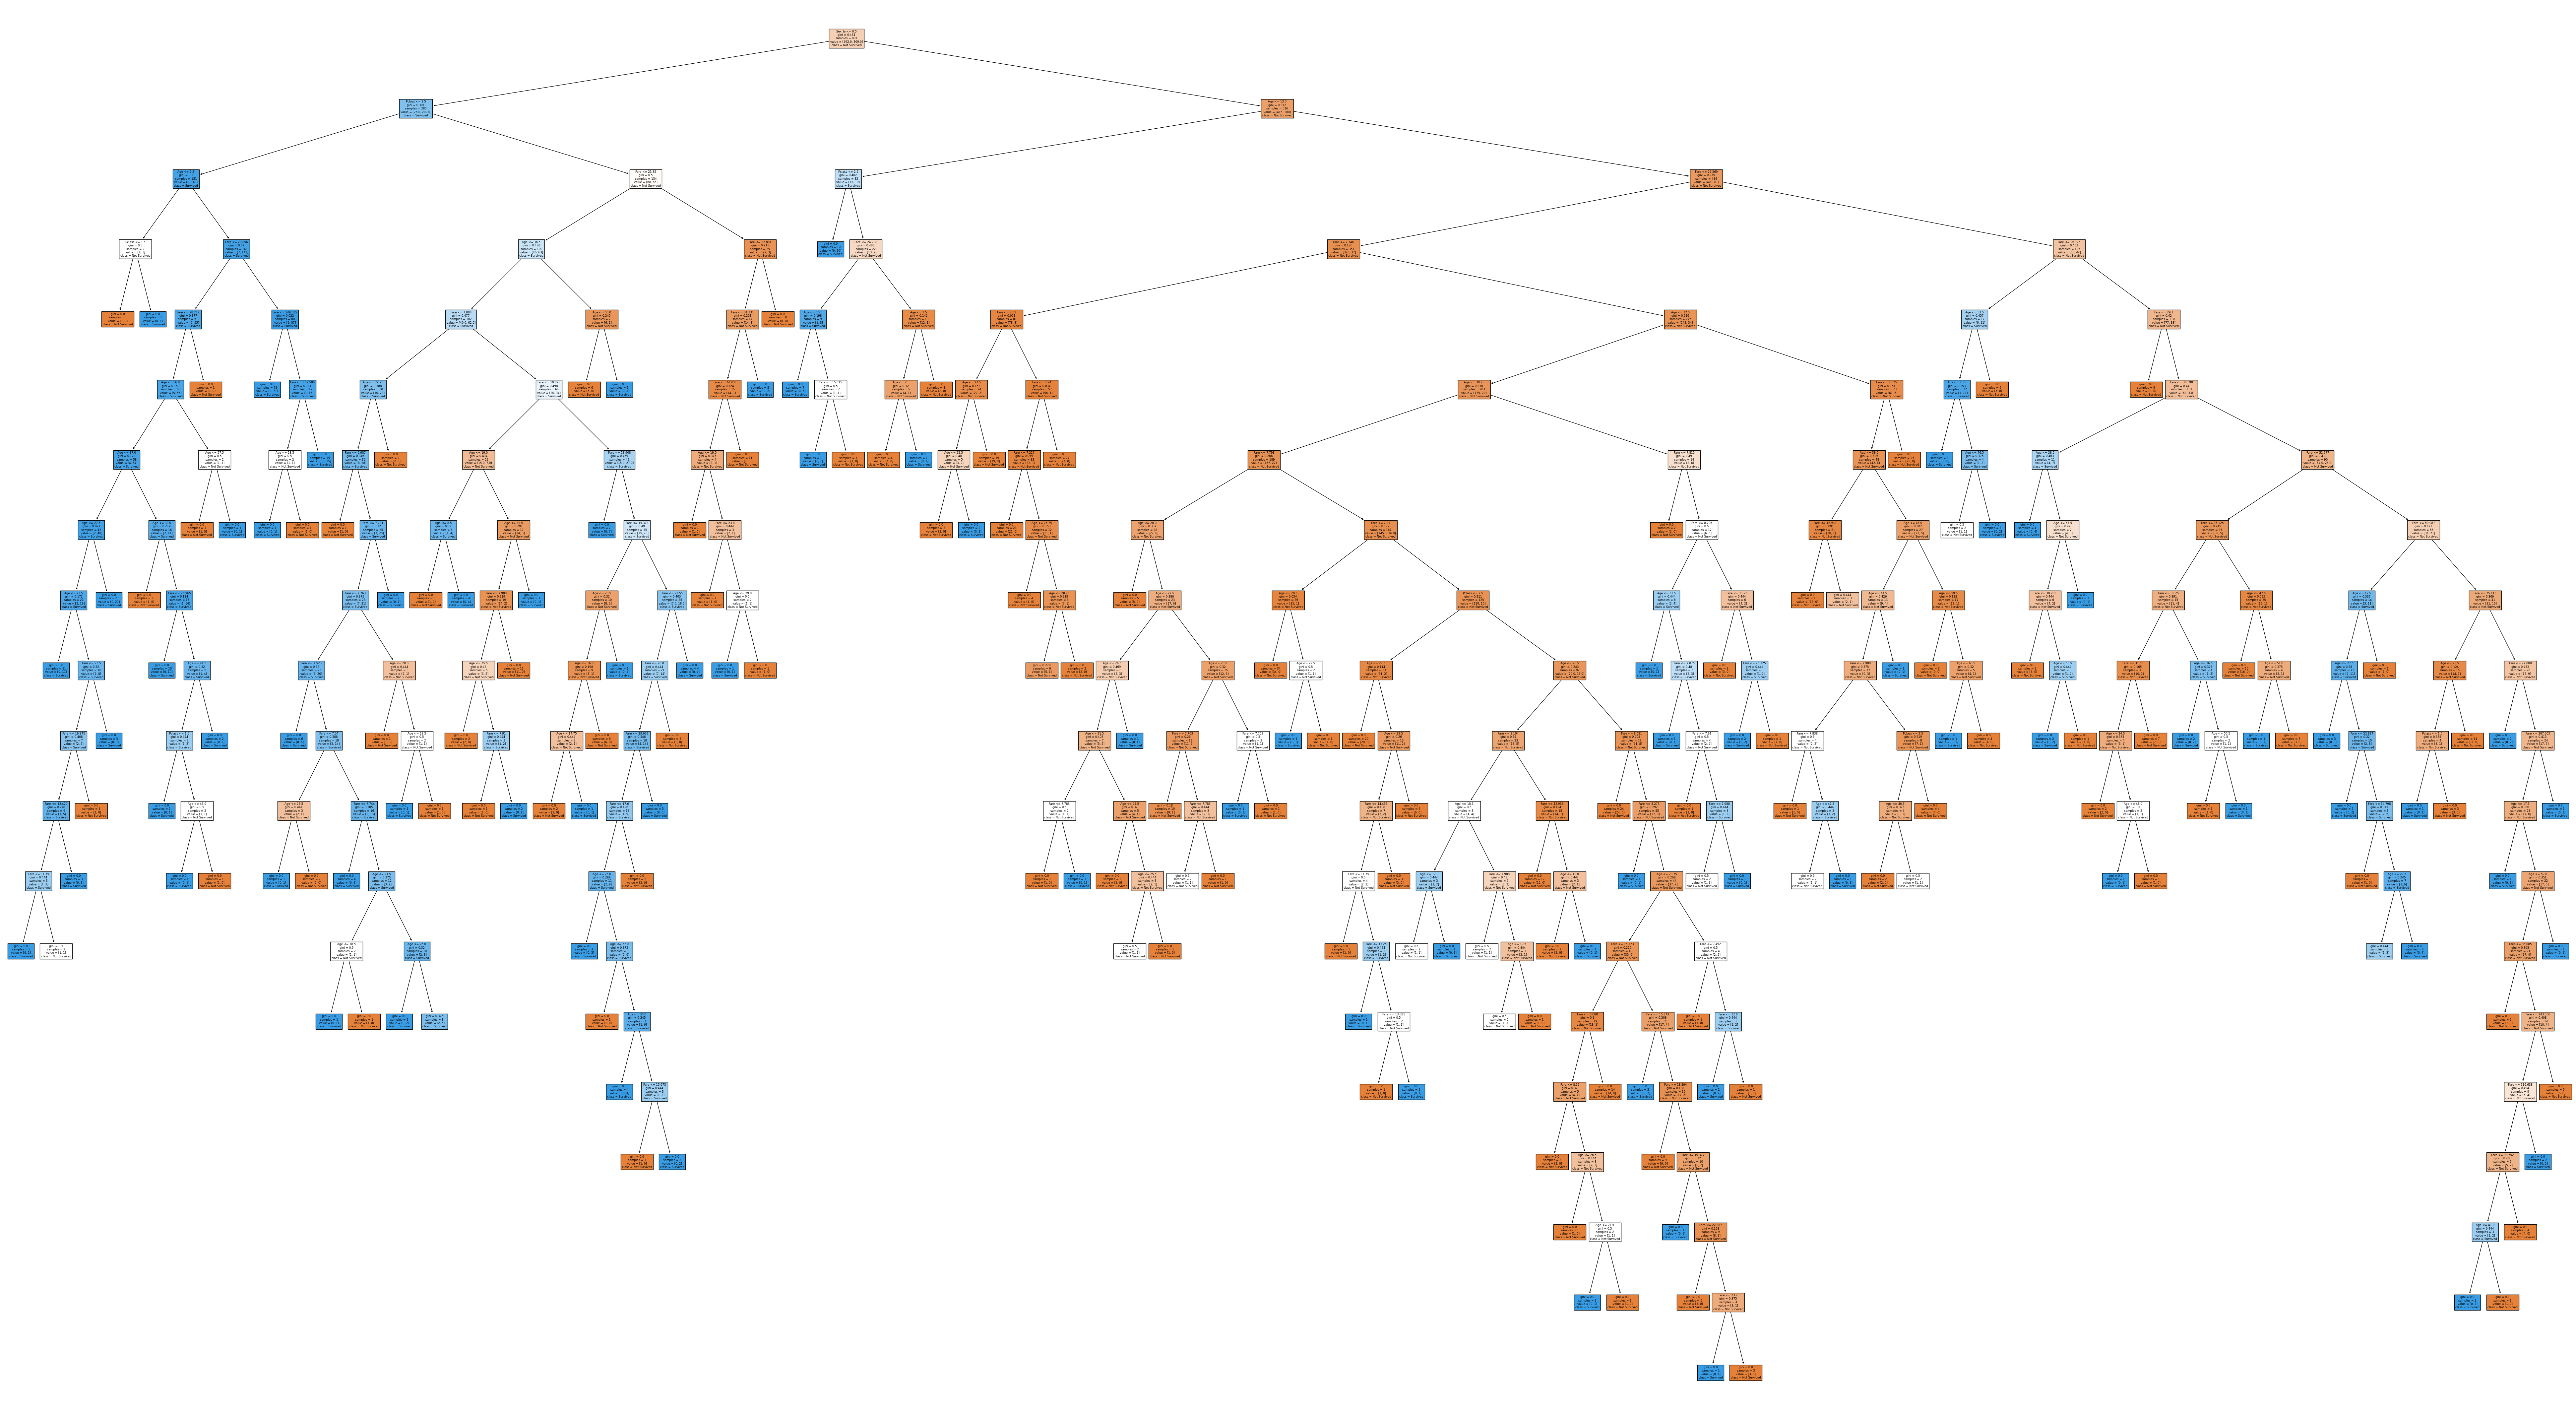

In [159]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 55))
plot_tree(model, feature_names=x.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
